<div dir = 'rtl'>

## تکلیف
 به دست آوردن توزیع $\chi^2$

تکلیف برازش


## هدف
در این تکلیف، شما با استفاده از تولید اعداد تصادفی و برازش یک تابع گاوسی (نرمال) بر روی داده‌ها، توزیع کای-دو (χ²) را بررسی خواهید کرد. هدف این است که ببینید توزیع مقادیر کمینه‌ی χ² چه شکلی دارد و چگونه به توزیع کای-دو مرتبط می‌شود.

## مراحل انجام کار

### ۱. تولید داده‌های تصادفی
1. یک تابع گاوسی با پارامترهای زیر تعریف کنید:
   - میانگین ($ \mu $): ۰
   - انحراف معیار ($ \sigma $): ۱
   - دامنه $ x $: از -۵ تا ۵ با گام‌های ۰٫۱

2. برای هر نقطه $ x $، مقدار تابع گاوسی را محاسبه کنید و به آن نویز گاوسی با انحراف معیار ۰٫۱ اضافه کنید. این داده‌های نویزی را به عنوان داده‌های آزمایشی در نظر بگیرید.

### ۲. برازش تابع گاوسی
1. تابع گاوسی زیر را برای برازش روی داده‌ها تعریف کنید:

   $$
   f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
   $$

2. با استفاده از روش کمترین مربعات (Least Squares)، پارامترهای $ \mu $ و $ \sigma $ را به گونه‌ای پیدا کنید که تابع گاوسی بهترین برازش را به داده‌های نویزی داشته باشد. مقدار χ² را برای این برازش محاسبه کنید.

### ۳. تکرار آزمایش
1. آزمایش بالا را ۱۰۰۰ بار تکرار کنید. در هر تکرار:
   - داده‌های نویزی جدید تولید کنید.
   - تابع گاوسی را برازش کنید.
   - مقدار χ² را محاسبه و ذخیره کنید.
   - ماتریس `covariance` را نیز در هر مرحله ذخیره کنید.

### ۴. تحلیل نتایج
1. هیستوگرام مقادیر χ² را رسم کنید.
2. توزیع کای-دو نظری با درجات آزادی مناسب را روی هیستوگرام رسم کنید و با توزیع تجربی مقایسه کنید.
3. میانگین و واریانس مقادیر χ² را محاسبه و با مقادیر نظری توزیع کای-دو مقایسه کنید.
4. توزیع مقادیر موجود در ماتریس `covariance` را رسم کنید. چه نتیجه ای می‌توانید از آن بگیرید؟

## سوالات

1. **هیستوگرام χ²:**  
   هیستوگرام مقادیر χ² را رسم کنید. آیا شکل آن شبیه به توزیع کای-دو است؟ چرا؟

2. **درجات آزادی:**  
   با توجه به تعداد پارامترهای برازش‌شده ($ \mu $ و $ \sigma $)، درجات آزادی توزیع کای-دو را محاسبه کنید. آیا این درجات آزادی با شکل هیستوگرام مطابقت دارد؟

3. **میانگین و واریانس:**  
   میانگین و واریانس مقادیر χ² را محاسبه کنید. آیا این مقادیر با مقادیر نظری توزیع کای-دو ($ \text{average} = k $ و $ \text{variance} = 2k $) مطابقت دارند؟

4. **تأثیر نویز:**  
   اگر انحراف معیار نویز را تغییر دهید (مثلاً به ۰٫۲ افزایش دهید)، چه تغییری در توزیع χ² مشاهده می‌کنید؟ آیا این تغییر با تئوری همخوانی دارد؟

5. **برازش توزیع کای-دو:**  
   با استفاده از روش‌های برازش، توزیع کای-دو نظری را به هیستوگرام مقادیر χ² برازش دهید. پارامترهای برازش‌شده چقدر با مقادیر نظری تفاوت دارند؟

+++
## نکات
- از کتابخانه‌های علمی مانند `numpy`، `scipy` و `matplotlib` در پایتون استفاده کنید.
- برای برازش تابع گاوسی می‌توانید از تابع `curve_fit` در `scipy.optimize` استفاده کنید.
- برای رسم توزیع کای-دو نظری از تابع `chi2.pdf` در `scipy.stats` استفاده کنید.

</div>

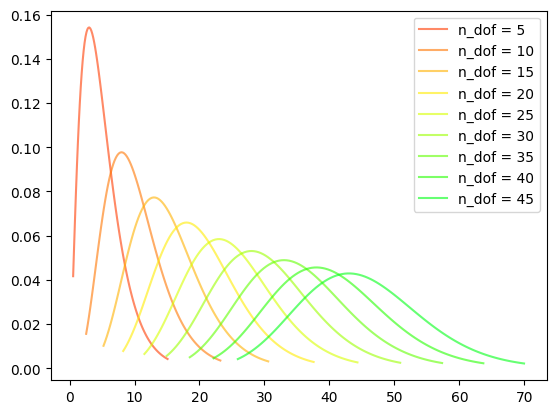

In [1]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

for df in range(5 , 50 , 5):
    x = np.linspace(chi2.ppf(0.01, df),
                    chi2.ppf(0.99, df), 100)
    ax.plot(x, chi2.pdf(x, df),
        color=plt.colormaps['hsv'](df*2) , alpha=0.6, label=f'n_dof = {df}')
    
plt.legend()
plt.show()

<div dir='rtl'>

# ۱

تعریف تابع گاوسی به همراه نویز:

In [2]:
def gaussian(E, mean, sigma, error):
    ret = 1 / sigma / np.sqrt(2 * np.pi) * np.exp(-(E - mean)**2 / (2 * sigma**2))
    
    if error != 0:
        errors = np.random.normal(0, error, E.shape)
        ret += ret * errors
    
    return ret

<div dir='rtl'>

# ۲

## ۲.۱
تعریف تابع گاوسی برای برازش:

In [3]:
def f(x, mu, sigma):
    return 1 / sigma / np.sqrt(2 * np.pi) * np.exp(-(x - mu)**2 / 2 / sigma**2)

<div dir='rtl'>

## ۲.۲
برازش روی داده‌ها برای یک آزمایش:

In [4]:
mu_0 = 0
sigma_0 = 1
error = 0.1
x = np.arange(-5, 5, 0.1)

data = gaussian(x, mu_0, sigma_0, error)

means = np.linspace(-1, 1, 50)
sigmas = np.linspace(0.1, 2, 110)

E_, means_, sigmas_ = np.meshgrid(x, means, sigmas)
allYs = f(E_, means_, sigmas_)

data = gaussian(x, mu_0, sigma_0, error)
experiment_new = np.repeat(data[np.newaxis, :, np.newaxis], means.size, axis=0)
experiment_new = np.repeat(experiment_new, sigmas.size, axis=2)

squares = np.sum((experiment_new - allYs)**2 / sigmas, axis=1)

argmin_mu, argmin_sigma = np.unravel_index(squares.argmin(), squares.shape)

print("The best values for fitting are: mu = {:.2f} and sigma = {:.2f}, with chi^2 = {:.3f}".format(
    means[argmin_mu], sigmas[argmin_sigma], squares.min())
)

The best values for fitting are: mu = -0.02 and sigma = 1.01, with chi^2 = 0.029


<div dir='rtl'>

# ۳

در ادامه آزمایش هزار بار تکرار می‌شود و مقدار $\chi^2$ برای تمام نقاط فضای فاز در هر آزمایش حساب می‌شود که بعدا بتوان با آن ماتریس همبستگی را حساب کرد. مقدار کمینه‌ی $\chi^2$ نیز برای آزمایش ذخیره می‌شود.

In [5]:
num_experiment = 1000
squares = np.zeros((num_experiment, means.size, sigmas.size))
least_squares = np.zeros(num_experiment)

for i in range(num_experiment):
    data = gaussian(x, mu_0, sigma_0, error)
    experiment_new = np.repeat(data[np.newaxis, :, np.newaxis], means.size, axis=0)
    experiment_new = np.repeat(experiment_new, sigmas.size, axis=2)

    squares[i] = np.sum((experiment_new - allYs)**2 / sigmas, axis=1)
    least_squares[i] = squares[i].min()

<div dir='rtl'>

ابتدا ماتریس هسین را حساب می‌کنیم و با وارونه کردن آن به ماتریس همبستگی می‌رسیم.

In [6]:
hessian = np.zeros((num_experiment, 2, 2))

for i in range(num_experiment):
    fxy = squares[i]
    argmin = np.unravel_index(squares[i].argmin(), squares[i].shape)
    # First-order gradients
    df_dx, df_dy = np.gradient(fxy, means, sigmas, edge_order=1)

    # Second-order gradients
    d2f_dxdx = np.gradient(df_dx, means, axis=0, edge_order=2)
    d2f_dxdy = np.gradient(df_dx, sigmas, axis=1, edge_order=2)
    d2f_dydx = np.gradient(df_dy, means, axis=0, edge_order=2)
    d2f_dydy = np.gradient(df_dy, sigmas, axis=1, edge_order=2)

    # Fill the Hessian matrix at each (x, y) point
    hessian[i, 0, 0] = d2f_dxdx[argmin]
    hessian[i, 0, 1] = d2f_dxdy[argmin]
    hessian[i, 1, 0] = d2f_dydx[argmin]
    hessian[i, 1, 1] = d2f_dydy[argmin]

covariance = np.linalg.inv(hessian)

<div dir='rtl'>

# ۴

## ۴.۱

هیستوگرام مقادیر شبیه‌سازی $\chi^2$:

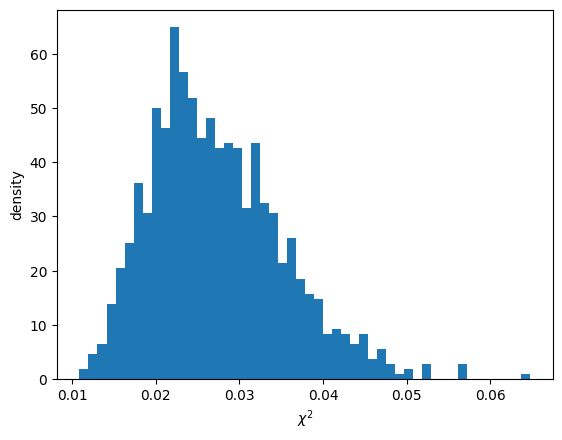

In [7]:
histogram, x, _ = plt.hist(least_squares, bins=50, density=True)
plt.xlabel(r'$\chi^2$')
plt.ylabel('density')
plt.show()

<div dir='rtl'>

## ۴.۲

برای پیدا کردن پارامترهای تابع نظری که با نتایج انطباق داشته باشد، باید بهینه مقدار درجات آزادی (df) و مقیاس (scale) را فیت کنیم:

In [8]:
def chi2_fit(x, df, scale):
    return chi2.pdf(x, df, scale=scale)

In [9]:
from scipy.optimize import curve_fit


x_fit = (x[:-1] + x[1:])/2
popt, pcov = curve_fit(chi2_fit, x_fit, histogram)

df, scale = popt
print("Degrees of freedom = {:d},\t Scale parameter = {:.4f}".format(int(df), scale))

Degrees of freedom = 23,	 Scale parameter = 0.0011


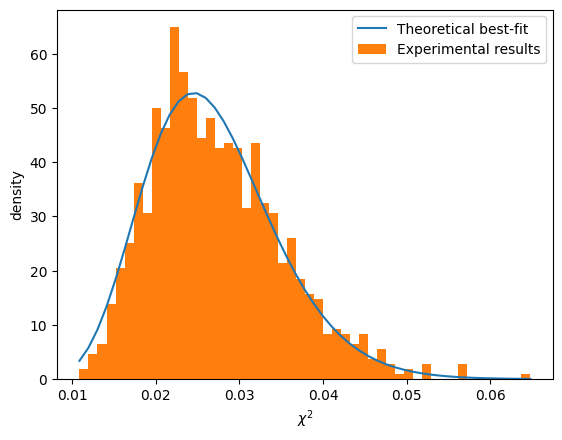

In [10]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, chi2.pdf(x, popt[0], scale=popt[1]), label="Theoretical best-fit")
ax.hist(least_squares, bins=50, density=True, label="Experimental results")
plt.xlabel(r'$\chi^2$')
plt.ylabel('density')
plt.legend()
plt.show()

<div dir='rtl'>

## ۴.۳

In [11]:
pdf = chi2.pdf(x, df, scale=scale)
mean = np.trapezoid(x * pdf, x)
std = np.sqrt(np.trapezoid((x - mean)**2 * pdf, x))

print("Experimental results: mean = {:.3f},\th std = {:.3f}.\n".format(least_squares.mean(), least_squares.std()))
print("Theoretical best-fit: mean = {:.3f},\th std = {:.3f}".format(mean, std))

Experimental results: mean = 0.027,	h std = 0.008.

Theoretical best-fit: mean = 0.027,	h std = 0.008


<div dir='rtl'>

## ۴.۴

نمودارهای زیر نشان می‌دهد بین مقادیر میانگین با یکدیگر و مقادیر انحراف معیار با یکدیگر، همبستگی آماری وجود دارد اما بین مقادیر میانگین با مقادیر انحراف معیار هیچگونه همبستگی دیده نمی‌شود. ای به این معنی است که

1. در توابع گاوسی پارامتر‌های مدل واقعا از یکدیگر مستقل‌اند

2. شبیه‌سازی به درستی انجام شده

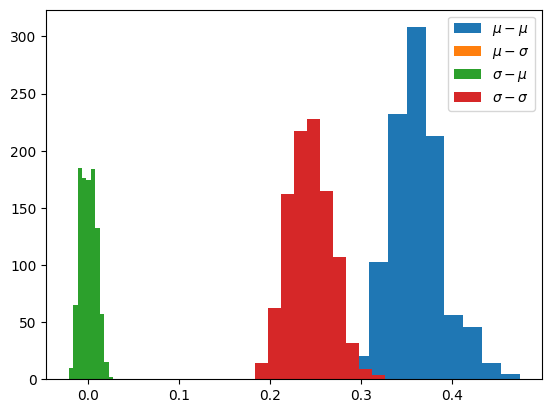

In [12]:
plt.hist(covariance[:,0,0], bins=10, label=r"$\mu-\mu$")
plt.hist(covariance[:,1,0], bins=10, label=r"$\mu-\sigma$")
plt.hist(covariance[:,0,1], bins=10, label=r"$\sigma-\mu$")
plt.hist(covariance[:,1,1], bins=10, label=r"$\sigma-\sigma$")
plt.legend()
plt.show()

<div dir='rtl'>


# سوالات

## 1. هیستوگرام χ²:
   هیستوگرام مقادیر χ² را رسم کنید. آیا شکل آن شبیه به توزیع کای-دو است؟ چرا؟

### جواب:
طبق نمودارهای رسم شده، اگر مقادیر درجات آزادی و مقیاس توزیع کای-دو به درستی فیکس شوند، هیستوگرام نتایج تجربی با توزیع کایدو به یک شکل در می‌آیند. به خاطر اینکه این توزیع، به این منظور طراحی شده که نتایج آنالیز کای-دو را برای داده‌های آماری پیش‌بینی کند.

## 2. درجات آزادی:
   با توجه به تعداد پارامترهای برازش‌شده ($ \mu $ و $ \sigma $)، درجات آزادی توزیع کای-دو را محاسبه کنید. آیا این درجات آزادی با شکل هیستوگرام مطابقت دارد؟

### جواب:
طبق فیت انجام شده، درجات آزادی توزیع کای-دو باید حدود ۲۳ باشد تا با بهترین تطابق را با هیستوگرام داشته باشند.

## 3. میانگین و واریانس:
   میانگین و واریانس مقادیر χ² را محاسبه کنید. آیا این مقادیر با مقادیر نظری توزیع کای-دو ($ \text{average} = k $ و $ \text{variance} = 2k $) مطابقت دارند؟

### جواب:
بهترین برازش انجام شده، تفاوت کمی با مقدار نظری دارد اما همچنان می‌توان یک توزیع کای-دو را روی آن فیت کرد.

## 4. تأثیر نویز: 
   اگر انحراف معیار نویز را تغییر دهید (مثلاً به ۰٫۲ افزایش دهید)، چه تغییری در توزیع χ² مشاهده می‌کنید؟ آیا این تغییر با تئوری همخوانی دارد؟

### جواب:
طبق محاسبات پایین بله.

## 5. برازش توزیع کای-دو:
   با استفاده از روش‌های برازش، توزیع کای-دو نظری را به هیستوگرام مقادیر χ² برازش دهید. پارامترهای برازش‌شده چقدر با مقادیر نظری تفاوت دارند؟

### جواب:
تفاوت ناچیز است.


In [19]:
mu_0 = 0
sigma_0 = 1
error = 0.2
x = np.arange(-5, 5, 0.1)

data = gaussian(x, mu_0, sigma_0, error)

means = np.linspace(-1, 1, 50)
sigmas = np.linspace(0.1, 2, 110)

E_, means_, sigmas_ = np.meshgrid(x, means, sigmas)
allYs = f(E_, means_, sigmas_)

data = gaussian(x, mu_0, sigma_0, error)
experiment_new = np.repeat(data[np.newaxis, :, np.newaxis], means.size, axis=0)
experiment_new = np.repeat(experiment_new, sigmas.size, axis=2)

squares = np.sum((experiment_new - allYs)**2 / sigmas, axis=1)

argmin_mu, argmin_sigma = np.unravel_index(squares.argmin(), squares.shape)

print("The best values for fitting are: mu = {:.2f} and sigma = {:.2f}, with chi^2 = {:.3f}".format(
    means[argmin_mu], sigmas[argmin_sigma], squares.min())
)

The best values for fitting are: mu = 0.02 and sigma = 0.97, with chi^2 = 0.110


In [20]:
num_experiment = 1000
squares = np.zeros((num_experiment, means.size, sigmas.size))
least_squares = np.zeros(num_experiment)

for i in range(num_experiment):
    data = gaussian(x, mu_0, sigma_0, error)
    experiment_new = np.repeat(data[np.newaxis, :, np.newaxis], means.size, axis=0)
    experiment_new = np.repeat(experiment_new, sigmas.size, axis=2)

    squares[i] = np.sum((experiment_new - allYs)**2 / sigmas, axis=1)
    least_squares[i] = squares[i].min()

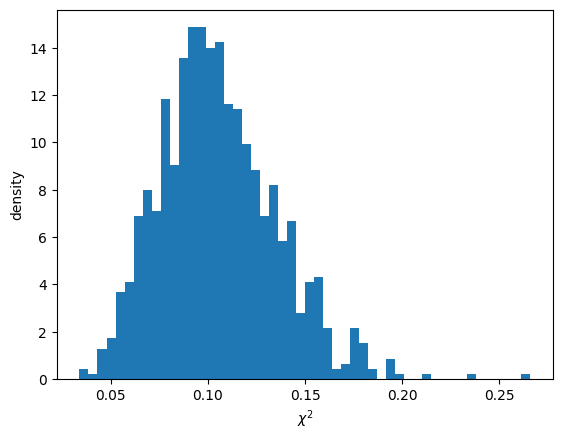

In [21]:
histogram, x, _ = plt.hist(least_squares, bins=50, density=True)
plt.xlabel(r'$\chi^2$')
plt.ylabel('density')
plt.show()

In [22]:
x_fit = (x[:-1] + x[1:])/2
popt, pcov = curve_fit(chi2_fit, x_fit, histogram)

df, scale = popt
print("Degrees of freedom = {:d},\t Scale parameter = {:.4f}".format(int(df), scale))

Degrees of freedom = 25,	 Scale parameter = 0.0042


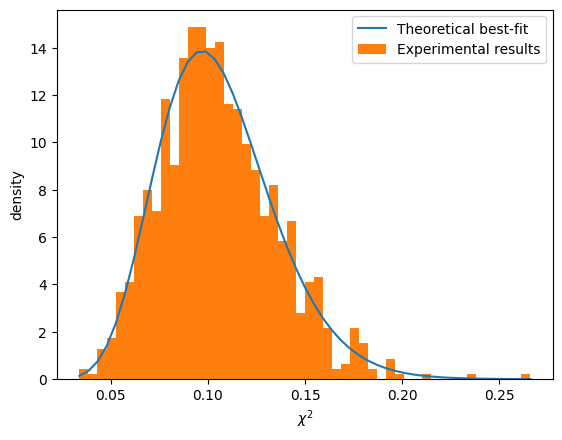

In [23]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, chi2.pdf(x, popt[0], scale=popt[1]), label="Theoretical best-fit")
ax.hist(least_squares, bins=50, density=True, label="Experimental results")
plt.xlabel(r'$\chi^2$')
plt.ylabel('density')
plt.legend()
plt.show()